## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#print(mouse_metadata)
#print(study_results)
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
len(combined_data['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'], keep = False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data[combined_data['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_data = combined_data.drop(combined_data[combined_data['Mouse ID'] == 'g989'].index)

In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_combined_data['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean_data = np.mean(clean_combined_data[clean_combined_data['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)'])
median_data = np.median(clean_combined_data[clean_combined_data['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)'])
var_data = np.var(clean_combined_data[clean_combined_data['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)'], ddof = 0)
sd_data = np.std(clean_combined_data[clean_combined_data['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)'], ddof = 0)
sem_data = sem(clean_combined_data[clean_combined_data['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)'])

print(clean_combined_data['Drug Regimen'].unique())

ramicane = clean_combined_data[clean_combined_data['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
mean_ramicane = np.mean(ramicane)
median_ramicane = np.median(ramicane)
var_ramicane = np.var(ramicane)
sd_ramicane = np.std(ramicane)
sem_ramicane = sem(ramicane)

capomulin = clean_combined_data[clean_combined_data['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
mean_capomulin = np.mean(capomulin)
median_capomulin = np.median(capomulin)
var_capomulin = np.var(capomulin)
sd_capomulin = np.std(capomulin)
sem_capomulin = sem(capomulin)

infubinol = clean_combined_data[clean_combined_data['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
mean_infubinol = np.mean(infubinol)
median_infubinol = np.median(infubinol)
var_infubinol = np.var(infubinol)
sd_infubinol = np.std(infubinol)
sem_infubinol = sem(infubinol)

placebo = clean_combined_data[clean_combined_data['Drug Regimen'] == 'Placebo']['Tumor Volume (mm3)']
mean_placebo = np.mean(placebo)
median_placebo = np.median(placebo)
var_placebo = np.var(placebo)
sd_placebo = np.std(placebo)
sem_placebo = sem(placebo)

ceftamin = clean_combined_data[clean_combined_data['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']
mean_ceftamin = np.mean(ceftamin)
median_ceftamin = np.median(ceftamin)
var_ceftamin = np.var(ceftamin)
sd_ceftamin = np.std(ceftamin)
sem_ceftamin = sem(ceftamin)

stelasyn = clean_combined_data[clean_combined_data['Drug Regimen'] == 'Stelasyn']['Tumor Volume (mm3)']
mean_stelasyn = np.mean(stelasyn)
median_stelasyn = np.median(stelasyn)
var_stelasyn = np.var(stelasyn)
sd_stelasyn = np.std(stelasyn)
sem_stelasyn = sem(stelasyn)

zoniferol = clean_combined_data[clean_combined_data['Drug Regimen'] == 'Zoniferol']['Tumor Volume (mm3)']
mean_zoniferol = np.mean(zoniferol)
median_zoniferol = np.median(zoniferol)
var_zoniferol = np.var(zoniferol)
sd_zoniferol = np.std(zoniferol)
sem_zoniferol = sem(zoniferol)

ketapril = clean_combined_data[clean_combined_data['Drug Regimen'] == 'Ketapril']['Tumor Volume (mm3)']
mean_ketapril = np.mean(ketapril)
median_ketapril = np.median(ketapril)
var_ketapril = np.var(ketapril)
sd_ketapril = np.std(ketapril)
sem_ketapril = sem(ketapril)

propriva = clean_combined_data[clean_combined_data['Drug Regimen'] == 'Propriva']['Tumor Volume (mm3)']
mean_propriva = np.mean(propriva)
median_propriva = np.median(propriva)
var_propriva = np.var(propriva)
sd_propriva = np.std(propriva)
sem_propriva = sem(propriva)

naftisol = clean_combined_data[clean_combined_data['Drug Regimen'] == 'Naftisol']['Tumor Volume (mm3)']
mean_naftisol = np.mean(naftisol)
median_naftisol = np.median(naftisol)
var_naftisol = np.var(naftisol)
sd_naftisol = np.std(naftisol)
sem_naftisol = sem(naftisol)

statistics_summary = pd.DataFrame({'Mean': [mean_ramicane, mean_capomulin, mean_infubinol, mean_placebo, mean_ceftamin, mean_stelasyn, mean_zoniferol, mean_ketapril, mean_propriva, mean_naftisol], 
                                   'Median': [median_ramicane, median_capomulin, median_infubinol, median_placebo, median_ceftamin, median_stelasyn, median_zoniferol, median_ketapril, median_propriva, median_naftisol], 
                                   'Variance': [var_ramicane, var_capomulin, var_infubinol, var_placebo, var_ceftamin, var_stelasyn, var_zoniferol, var_ketapril, var_propriva, var_naftisol], 
                                   'Standard Deviation': [sd_ramicane, sd_capomulin, sd_infubinol, sd_placebo, sd_ceftamin, sd_stelasyn, sd_zoniferol, sd_ketapril, sd_propriva, sd_naftisol], 
                                   'SEM': [sem_ramicane, sem_capomulin, sem_infubinol, sem_placebo, sem_ceftamin, sem_stelasyn, sem_zoniferol, sem_ketapril, sem_propriva, sem_naftisol]}, index = clean_combined_data['Drug Regimen'].unique())
print(statistics_summary)

# This method is the most straighforward, creating multiple series and putting them all together at the end.

tumor_data_by_drug = clean_combined_data.groupby('Drug Regimen', sort = False)['Tumor Volume (mm3)']
avg_table = tumor_data_by_drug.mean()
med_table = tumor_data_by_drug.median()
var_table = tumor_data_by_drug.var()
std_table = tumor_data_by_drug.std()
sem_table = tumor_data_by_drug.sem()

statistics_summary_alt = pd.DataFrame({'Mean': avg_table, 'Median': med_table, 'Variance': var_table, 'Standard Deviation': std_table, 'SEM': sem_table})
print(statistics_summary_alt)

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']
                Mean     Median   Variance  Standard Deviation       SEM
Ramicane   40.216745  40.673236  23.383692            4.835669  0.320955
Capomulin  40.675741  41.557809  24.839296            4.983904  0.329346
Infubinol  52.884795  51.820584  42.886388            6.548770  0.492236
Placebo    54.033581  52.288934  60.830138            7.799368  0.581331
Ceftamin   52.591172  51.776157  39.069446            6.250556  0.469821
Stelasyn   54.233149  52.431737  59.122106            7.689090  0.573111
Zoniferol  53.236507  51.818479  48.266689            6.947423  0.516398
Ketapril   55.235638  53.698743  68.188930            8.257659  0.603860
Propriva   52.320930  50.446266  43.555716            6.599675  0.544332
Naftisol   54.331565  52.509285  65.817708            8.112811  0.596466
                   Mean     Median   Variance  Standard Deviation       SEM
Drug R

## Bar and Pie Charts

Drug Regimen
Ramicane     [k403, g791, s508, m546, z578, j913, n364, c75...
Capomulin    [s185, x401, m601, f966, u364, y793, r554, m95...
Infubinol    [a203, a251, a577, a685, c139, c326, c895, e47...
Placebo      [a262, a897, c282, c757, c766, e227, i477, i66...
Ceftamin     [a275, b447, b487, b759, f436, h531, j296, k21...
Stelasyn     [a366, a492, a963, b879, c402, f234, g867, h33...
Zoniferol    [a401, a788, b313, c264, c302, c559, d133, d16...
Ketapril     [a457, c580, c819, c832, d474, f278, f932, g10...
Propriva     [a699, c927, g558, g570, i635, k603, l215, n48...
Naftisol     [a818, b559, e213, e291, e584, f993, j755, l70...
Name: Mouse ID, dtype: object


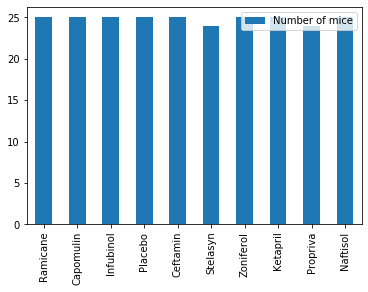

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
mice_by_regimen = clean_combined_data.groupby('Drug Regimen', sort = False)['Mouse ID'].unique()
print(mice_by_regimen)

ram_mice = len(mice_by_regimen[0])
cap_mice = len(mice_by_regimen[1])
inf_mice = len(mice_by_regimen[2])
pla_mice = len(mice_by_regimen[3])
cef_mice = len(mice_by_regimen[4])
ste_mice = len(mice_by_regimen[5])
zon_mice = len(mice_by_regimen[6])
ket_mice = len(mice_by_regimen[7])
pro_mice = len(mice_by_regimen[8])
naf_mice = len(mice_by_regimen[9])

number_of_mice_by_regimen = [ram_mice, cap_mice, inf_mice, pla_mice, cef_mice, ste_mice, zon_mice, ket_mice, pro_mice, naf_mice]

mice_regime_df = pd.DataFrame({'Number of mice': number_of_mice_by_regimen}, index = clean_combined_data['Drug Regimen'].unique())
mice_regime_df.plot.bar()

([<matplotlib.axis.XTick at 0x13e1e97db48>,
 <a list of 10 Text xticklabel objects>)

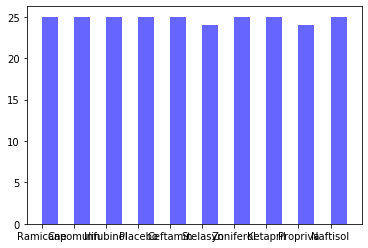

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(number_of_mice_by_regimen))
plt.bar(x_axis, number_of_mice_by_regimen, color = 'b', alpha = 0.6, align = 'edge', width = 0.5)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, clean_combined_data['Drug Regimen'].unique())

Sex
Male      [k403, m601, g791, s508, f966, m546, z578, u36...
Female    [s185, x401, j913, r554, m957, t565, a644, i73...
Name: Mouse ID, dtype: object


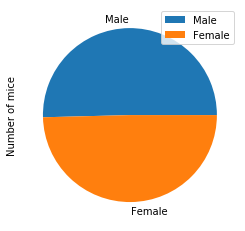

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_by_sex = clean_combined_data.groupby('Sex', sort = False)['Mouse ID'].unique()
print(mice_by_sex)

male_mice = len(mice_by_sex[0])
fema_mice = len(mice_by_sex[1])
mice_sex_number = [male_mice, fema_mice]

mice_sex_df = pd.DataFrame({'Number of mice': mice_sex_number}, index = clean_combined_data['Sex'].unique())
mice_sex_df.plot.pie(y = 'Number of mice')

([<matplotlib.patches.Wedge at 0x13e1ea73ec8>,
 [Text(-0.013934097579311132, 1.0999117423341975, 'Male'),
  Text(0.013934097579310996, -1.0999117423341975, 'Female')])

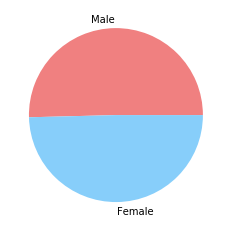

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = mice_sex_number
labels = clean_combined_data['Sex'].unique()
colors = ['lightcoral', 'lightskyblue']
plt.pie(sizes, labels = labels, colors = colors)

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin.
most_promis = clean_combined_data[clean_combined_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

timepoint45 = most_promis[most_promis['Timepoint'] == 45]
most_promis_drop_45 = most_promis.drop(most_promis[most_promis['Mouse ID'].isin(timepoint45['Mouse ID'].values)].index)

timepoint40 = most_promis_drop_45[most_promis_drop_45['Timepoint'] == 40]
most_promis_drop_40 = most_promis_drop_45.drop(most_promis_drop_45[most_promis_drop_45['Mouse ID'].isin(timepoint40['Mouse ID'].values)].index)

timepoint35 = most_promis_drop_40[most_promis_drop_40['Timepoint'] == 35]
most_promis_drop_35 = most_promis_drop_40.drop(most_promis_drop_40[most_promis_drop_40['Mouse ID'].isin(timepoint35['Mouse ID'].values)].index)

timepoint30 = most_promis_drop_35[most_promis_drop_35['Timepoint'] == 30]
most_promis_drop_30 = most_promis_drop_35.drop(most_promis_drop_35[most_promis_drop_35['Mouse ID'].isin(timepoint30['Mouse ID'].values)].index)

timepoint25 = most_promis_drop_30[most_promis_drop_30['Timepoint'] == 25]
most_promis_drop_25 = most_promis_drop_30.drop(most_promis_drop_30[most_promis_drop_30['Mouse ID'].isin(timepoint25['Mouse ID'].values)].index)

timepoint20 = most_promis_drop_25[most_promis_drop_25['Timepoint'] == 20]
most_promis_drop_20 = most_promis_drop_25.drop(most_promis_drop_25[most_promis_drop_25['Mouse ID'].isin(timepoint20['Mouse ID'].values)].index)

timepoint15 = most_promis_drop_20[most_promis_drop_20['Timepoint'] == 15]
most_promis_drop_15 = most_promis_drop_20.drop(most_promis_drop_20[most_promis_drop_20['Mouse ID'].isin(timepoint15['Mouse ID'].values)].index)

timepoint10 = most_promis_drop_15[most_promis_drop_15['Timepoint'] == 10]
most_promis_drop_10 = most_promis_drop_15.drop(most_promis_drop_15[most_promis_drop_15['Mouse ID'].isin(timepoint10['Mouse ID'].values)].index)

timepoint5 = most_promis_drop_10[most_promis_drop_10['Timepoint'] == 5]
most_promis_drop_5 = most_promis_drop_10.drop(most_promis_drop_10[most_promis_drop_10['Mouse ID'].isin(timepoint5['Mouse ID'].values)].index)

timepoint0 = most_promis_drop_5[most_promis_drop_5['Timepoint'] == 0]
most_promis_drop_0 = most_promis_drop_5.drop(most_promis_drop_5[most_promis_drop_5['Mouse ID'].isin(timepoint0['Mouse ID'].values)].index)

final_vol_most_promise = pd.concat([timepoint45, timepoint40, timepoint35, timepoint30, timepoint25, timepoint20, timepoint15, timepoint10, timepoint5, timepoint0], ignore_index = True)[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
final_vol_most_promise

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,k403,Ramicane,22.050126
1,s185,Capomulin,23.343598
2,x401,Capomulin,28.484033
3,m601,Capomulin,28.430964
4,g791,Ramicane,29.128472
...,...,...,...
95,v339,Infubinol,46.250112
96,b447,Ceftamin,45.000000
97,t573,Ceftamin,45.000000
98,u153,Ceftamin,45.000000


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
final_vol_capomulin = final_vol_most_promise[final_vol_most_promise['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
final_vol_ramicane = final_vol_most_promise[final_vol_most_promise['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
final_vol_infubinol = final_vol_most_promise[final_vol_most_promise['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
final_vol_ceftamin = final_vol_most_promise[final_vol_most_promise['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

four_treatments = [final_vol_capomulin, final_vol_ramicane, final_vol_infubinol, final_vol_ceftamin]

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles_cap = final_vol_capomulin.quantile([.25, .5, .75])
lowerq_cap = quartiles_cap[0.25]
upperq_cap = quartiles_cap[0.75]
iqr_cap = upperq_cap - lowerq_cap
print(f'The lower quartile of the tumor volume is: {lowerq_cap}')
print(f'The upper quartile of the tumor volume is: {upperq_cap}')
print(f'The interquartile range of the tumor volume is: {iqr_cap}')
lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)
print(f'Values below {lower_bound_cap} could be outliers')
print(f'Values above {upper_bound_cap} could be outliers')
max_tumor_vol_cap = final_vol_capomulin.max()
min_tumor_vol_cap = final_vol_capomulin.min()
print(f'Maximum tumor volume is: {max_tumor_vol_cap}')
print(f'Minimum tumor volume is: {min_tumor_vol_cap}')
print('There are no outliers for Capomulin')
print('')

quartiles_ram = final_vol_ramicane.quantile([.25, .5, .75])
lowerq_ram = quartiles_ram[0.25]
upperq_ram = quartiles_ram[0.75]
iqr_ram = upperq_ram - lowerq_ram
print(f'The lower quartile of the tumor volume is: {lowerq_ram}')
print(f'The upper quartile of the tumor volume is: {upperq_ram}')
print(f'The interquartile range of the tumor volume is: {iqr_ram}')
lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)
print(f'Values below {lower_bound_ram} could be outliers')
print(f'Values above {upper_bound_ram} could be outliers')
max_tumor_vol_ram = final_vol_ramicane.max()
min_tumor_vol_ram = final_vol_ramicane.min()
print(f'Maximum tumor volume is: {max_tumor_vol_ram}')
print(f'Minimum tumor volume is: {min_tumor_vol_ram}')
print('There are no outliers for Ramicane')
print('')

quartiles_inf = final_vol_infubinol.quantile([.25, .5, .75])
lowerq_inf = quartiles_inf[0.25]
upperq_inf = quartiles_inf[0.75]
iqr_inf = upperq_inf - lowerq_inf
print(f'The lower quartile of the tumor volume is: {lowerq_inf}')
print(f'The upper quartile of the tumor volume is: {upperq_inf}')
print(f'The interquartile range of the tumor volume is: {iqr_inf}')
lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
upper_bound_inf = upperq_inf + (1.5*iqr_inf)
print(f'Values below {lower_bound_inf} could be outliers')
print(f'Values above {upper_bound_inf} could be outliers')
max_tumor_vol_inf = final_vol_infubinol.max()
min_tumor_vol_inf = final_vol_infubinol.min()
print(f'Maximum tumor volume is: {max_tumor_vol_inf}')
print(f'Minimum tumor volume is: {min_tumor_vol_inf}')
print('There is one possible outlier for Infubinol')
print('')

quartiles_cef = final_vol_ceftamin.quantile([.25, .5, .75])
lowerq_cef = quartiles_cef[0.25]
upperq_cef = quartiles_cef[0.75]
iqr_cef = upperq_cef - lowerq_cef
print(f'The lower quartile of the tumor volume is: {lowerq_cef}')
print(f'The upper quartile of the tumor volume is: {upperq_cef}')
print(f'The interquartile range of the tumor volume is: {iqr_cef}')
lower_bound_cef = lowerq_cef - (1.5*iqr_cef)
upper_bound_cef = upperq_cef + (1.5*iqr_cef)
print(f'Values below {lower_bound_cef} could be outliers')
print(f'Values above {upper_bound_cef} could be outliers')
max_tumor_vol_cef = final_vol_ceftamin.max()
min_tumor_vol_cef = final_vol_ceftamin.min()
print(f'Maximum tumor volume is: {max_tumor_vol_cef}')
print(f'Minimum tumor volume is: {min_tumor_vol_cef}')
print('There are no outliers for Ceftamin')

# Locate the rows which contain mice on each drug and get the tumor volumes

    
# add subset 
    
    
# Determine outliers using upper and lower bounds

The lower quartile of the tumor volume is: 32.37735684
The upper quartile of the tumor volume is: 40.1592203
The interquartile range of the tumor volume is: 7.781863460000004
Values below 20.70456164999999 could be outliers
Values above 51.83201549 could be outliers
Maximum tumor volume is: 47.68596303
Minimum tumor volume is: 23.34359787
There are no outliers for Capomulin

The lower quartile of the tumor volume is: 31.56046955
The upper quartile of the tumor volume is: 40.65900627
The interquartile range of the tumor volume is: 9.098536719999998
Values below 17.912664470000003 could be outliers
Values above 54.30681135 could be outliers
Maximum tumor volume is: 45.22086888
Minimum tumor volume is: 22.05012627
There are no outliers for Ramicane

The lower quartile of the tumor volume is: 54.04860769
The upper quartile of the tumor volume is: 65.52574285
The interquartile range of the tumor volume is: 11.477135160000003
Values below 36.83290494999999 could be outliers
Values above 82.7

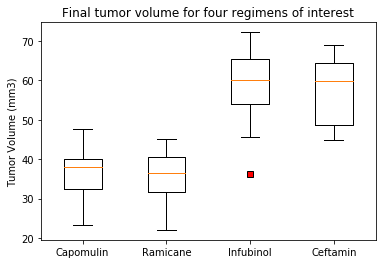

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_square = dict(markerfacecolor='r', marker='s')
fig1, ax1 = plt.subplots()
ax1.set_title('Final tumor volume for four regimens of interest')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(four_treatments, flierprops=red_square, labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
